# **Project Name**    -Coronavirus_Tweet_Sentiment_Analysis



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member** -Rina Patel

# **Project Summary -**

Introduction:
The COVID-19 pandemic has had a profound impact on the world, affecting the lives of individuals in numerous ways. Social media platforms like Twitter have become a prominent space for people to express their thoughts, emotions, and opinions during this challenging period. Analyzing sentiment in COVID-19 related tweets has been a valuable task for understanding public sentiment, monitoring trends, and informing public health policies. This project focuses on performing sentiment analysis on a large dataset of COVID-19 related tweets to gain insights into the emotional reactions and concerns of the public.

**Details Features information**
* **UserName**: This is the username(encoded in number) unique for every datapoints
* **ScreenName**: This is the ScreenName(encoded in number) unique for every datapoints
* **Location**: places wherefrom tweets are comming
* **TweetAt**: date of tweets data collected
* **OriginalTweet**: Original tweets are stored (This feature is more important in our analysis)
* **Sentiment**: types of sentiment (Positive, Negative, Neutral, Extremely Positive, Extremely Negative) it is dependent variable.

Data Collection:
The first step in this project was the collection of COVID-19 related tweets. The tweets have been pulled from Twitter and manual tagging has been done then. which covered the onset of the pandemic in early 2020 until the most recent data available. These tweets included a variety of keywords related to COVID-19, such as "coronavirus," "pandemic," "vaccine," and "lockdown."

Data Preprocessing:
Before conducting sentiment analysis, the collected tweets underwent preprocessing steps. These included text cleaning, which involved removing special characters, hashtags, and mentions, as well as tokenization and stemming to standardize text.

Sentiment Analysis:
The sentiment analysis involved the use of natural language processing (NLP) techniques to classify tweets into different sentiment categories, including positive, negative, and neutral. A pre-trained machine learning model, such as VADER (Valence Aware Dictionary and sEntiment Reasoner), was used to analyze the sentiment of each tweet. VADER assigns a sentiment score to each tweet, making it possible to classify them accordingly.

Results and Insights:
The sentiment analysis revealed several key insights into public sentiment during the COVID-19 pandemic:

Conclusion:
This COVID-19 tweet sentiment analysis project provided valuable insights into the emotional responses and concerns of the public throughout the pandemic. By monitoring sentiment on social media, health authorities and policymakers gained a better understanding of the public's needs and concerns, helping them make informed decisions. The project highlights the importance of harnessing data science and natural language processing techniques to gain insights from large-scale social media data during crises like the COVID-19 pandemic.

Provide your GitHub Link here.

# **Problem Statement**


### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Importing libraries
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import re # for regular expressions
import nltk # for text manipulation
from nltk.stem.porter import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

### Dataset Loading

In [2]:
#Load Dataset
coronavirurs_tweet = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Coronavirus Tweet Sentiment Analysis/Coronavirus Tweets.csv',encoding='latin')


### Dataset First View

In [3]:
# Dataset First Look
coronavirurs_tweet.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...,Positive
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\...",Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don...",Extremely Negative
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,"As news of the regionÂs first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and ot...",Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,"Cashier at grocery store was sharing his insights on #Covid_19 To prove his credibility he commented ""I'm in Civics class so I know what I'm talking about"". https://t.co/ieFDNeHgDO",Positive
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toilet paper. #Rebel\r\r\n\r\r\n#toiletpapercrisis #covid_19 https://t.co/eVXkQLIdAZ,Neutral
8,3807,48759,"Atlanta, GA USA",16-03-2020,"Due to COVID-19 our retail store and classroom in Atlanta will not be open for walk-in business or classes for the next two weeks, beginning Monday, March 16. We will continue to process online a...",Positive
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy things with the cash and should use online payment methods because corona can spread through the notes. Also we should prefer online shopping from our h...",Negative


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
coronavirurs_tweet.shape

(41157, 6)

### Dataset Information

In [5]:
# Dataset Info
coronavirurs_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
coronavirurs_tweet.duplicated().sum()

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
coronavirurs_tweet.isna().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

<Axes: >

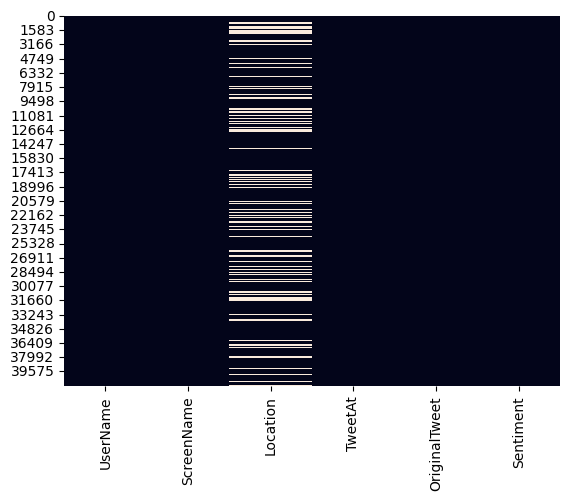

In [8]:
# Visualizing the missing values
sns.heatmap(coronavirurs_tweet.isna(), cbar=False)

### What did you know about your dataset?

Answer Here
The Coronavirus dataset contains 41157 rows and 6 columns.No duplicate values have been identified in the dataset. Around 20% of the data is missing in one columns: "Location".

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
coronavirurs_tweet.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [10]:
# Dataset Describe
coronavirurs_tweet.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


### Variables Description

Answer Here
The dataset comprises 6 variables, with 2 being numeric and 4 being of object type.

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
for i in coronavirurs_tweet.columns.tolist():
    print("No. of unique values in ",i,"is",coronavirurs_tweet[i].unique(),".")
    print('')

No. of unique values in  UserName is [ 3799  3800  3801 ... 44953 44954 44955] .

No. of unique values in  ScreenName is [48751 48752 48753 ... 89905 89906 89907] .

No. of unique values in  Location is ['London' 'UK' 'Vagabonds' ... 'Juba south sudan' 'OHIO'
 'i love you so much || he/him'] .

No. of unique values in  TweetAt is ['16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020'] .

No. of unique values in  OriginalTweet is ['@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8'
 'advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of nei

In [12]:
# Check Unique Values for each variable.
for i in coronavirurs_tweet.columns.tolist():
  print("No. of unique values in ",i,"is",coronavirurs_tweet[i].nunique(),".")

No. of unique values in  UserName is 41157 .
No. of unique values in  ScreenName is 41157 .
No. of unique values in  Location is 12220 .
No. of unique values in  TweetAt is 30 .
No. of unique values in  OriginalTweet is 41157 .
No. of unique values in  Sentiment is 5 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

In [13]:
#dropping UserName and ScreenName features
coronavirurs_tweet= coronavirurs_tweet.drop(['UserName', 'ScreenName'], axis=1)

In [14]:
#checking duplicate rows
coronavirurs_tweet.duplicated().sum()

0

In [15]:
#checking null value in dataset
coronavirurs_tweet.isnull().sum()

Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [16]:
#calculating null value percentage in location feature
coronavirurs_tweet['Location'].isna().sum()/len(coronavirurs_tweet) *100

20.87129771363316

In [17]:
#checking unique value feature-wise
coronavirurs_tweet.nunique()

Location         12220
TweetAt             30
OriginalTweet    41157
Sentiment            5
dtype: int64

*  ### **Location**

In [18]:
#top 10 location wise tweets
top_10_loc = coronavirurs_tweet['Location'].value_counts().head(10)
top_10_loc_df = pd.DataFrame(top_10_loc)
top_10_loc_df.reset_index(inplace=True)
top_10_loc_df = top_10_loc_df.rename(columns={'index':'Location', 'Location':'Tweet_count'})
top_10_loc_df

,Location,Tweet_count
0,London,540
1,United States,528
2,"London, England",520
3,"New York, NY",395
4,"Washington, DC",373
5,United Kingdom,337
6,"Los Angeles, CA",281
7,India,268
8,UK,232
9,Australia,225


*  ### **TweetAt**

In [19]:
#checking unique value in TweetAt feature
coronavirurs_tweet['TweetAt'].value_counts()

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64

*  ### **Sentiment**

In [20]:
#checking unique value in Sentiment feature
coronavirurs_tweet['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

This feature is our target feature in our analysis
there are five types of Sentiment in this Dataset: Positive, Negative, Neutral, Extremely Positive, Extremely Negative

*   ### **Exploring Sentiment type-wise**

In [21]:
#extracting Extremely Negative tweets
coronavirurs_tweet[coronavirurs_tweet['Sentiment']=='Extremely Negative']

,Location,TweetAt,OriginalTweet,Sentiment
4,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don...",Extremely Negative
20,southampton soxx xxx,16-03-2020,with 100 nations inficted with covid 19 the world must not play fair with china 100 goverments must demand china adopts new guilde lines on food safty the chinese goverment is guilty...,Extremely Negative
27,Everywhere You Are!,16-03-2020,"This morning I tested positive for Covid 19. I feel ok, I have no symptoms so far but have been isolated since I found out about my possible exposure to the virus. Stay home people and be pragmat...",Extremely Negative
29,"Someplace, USA",16-03-2020,@7SealsOfTheEnd Soon with dwindling supplies unlawful Panicky people will be breaking into Closed Stores &amp; Supermarkets to Raid them as they normally do during a Crisis so massive as the #Coro...,Extremely Negative
42,Houston,16-03-2020,CHECK VIDEO ?? https://t.co/1ksn9Brl02 ??No food ? in USA market due to coronavirus panic we gonna die from starvation #CoronavirusOutbreak #coronavirus #houston #nofood #Notoiletpaper #NoHandShak...,Extremely Negative
...,...,...,...,...
41115,NaN,14-04-2020,"Food Banks are not equipped for a 30% unemployment rate. The federal government must provide direct aid to everyone, very quickly.\r\r\n\r\r\n""The Coronavirus Food Bank Crisis Is Already Underway""...",Extremely Negative
41128,"Melbourne, Australia",14-04-2020,"The COVID-19 pandemic and global oil price wars are having an economic impact worldwide, but one consequence is lower fuel prices at Australian petrol pumps for the foreseeable.\r\r\n\r\r\n#UniMel...",Extremely Negative
41130,NaN,14-04-2020,Squeo works in the meat department of a Kroger supermarket in Michigan. He knows of several grocery workers whoÂve tested positive for COVID-19 and one in his area who died. He worries that the b...,Extremely Negative
41133,Austria,14-04-2020,A Singaporean politician who slammed a woman snapped with seven supermarket trolleys during COVID-19 lockdown has been forced to eat humble pie after it turned out she was donating goods to the po...,Extremely Negative


In [22]:
#details comment of Extremely Negative Tweet
coronavirurs_tweet[coronavirurs_tweet['Sentiment']=='Extremely Negative'].loc[41133,'OriginalTweet']

'A Singaporean politician who slammed a woman snapped with seven supermarket trolleys during COVID-19 lockdown has been forced to eat humble pie after it turned out she was donating goods to the poor\r\r\nhttps://t.co/EDBXXtdHxl\r\r\n#covid19 #lockdown'

In [23]:
#extracting Negative tweets
coronavirurs_tweet[coronavirurs_tweet['Sentiment']=='Negative']

,Location,TweetAt,OriginalTweet,Sentiment
9,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy things with the cash and should use online payment methods because corona can spread through the notes. Also we should prefer online shopping from our h...",Negative
24,Downstage centre,16-03-2020,@10DowningStreet @grantshapps what is being done to ensure food and other essential products are being re-stocked at supermarkets and panic buying actively discouraged? It cannot be left to checko...,Negative
26,"Ketchum, Idaho",16-03-2020,"In preparation for higher demand and a potential food shortage, The Hunger Coalition purchased 10 percent more food and implemented new protocols due to the COVID-19 coronavirus. https://t.co/5Cec...",Negative
28,"New York, NY",16-03-2020,Do you see malicious price increases in NYC? The NYC Department of Consumer and Worker Protection (DCWP) has set up a page to digitally file a complaint. Click here: https://t.co/oEx6Y8mm2K\r\r\n\...,Negative
30,NaN,16-03-2020,There Is of in the Country The more empty shelves people see the more buying ensues the more food is out of stock,Negative
...,...,...,...,...
41127,NaN,14-04-2020,Today at the grocery store I saw someone getting a case of #Corona beer and I was about to jokingly say 'hey man i see you got Corona' then I stopped myself doing that thinking it would be the new...,Negative
41131,"Accra, Ghana",14-04-2020,"In every human affliction there are gainers and losers. In this case of Covid 19, the TELECOS are gaining beyond expectations. The level of internet being used at this moment is mind blowing. Gov...",Negative
41147,"Brooklyn, NY",14-04-2020,YÂall really shitting that much more at home?? #COVID19 #coronavirus #toiletpaper,Negative
41149,"Toronto, Ontario",14-04-2020,"Still shocked by the number of #Toronto supermarket employees working without some sort of mask. We all know by now, employees can be asymptomatic while spreading #coronavirus .",Negative


In [24]:
#details comment of Negative Tweet
coronavirurs_tweet[coronavirurs_tweet['Sentiment']=='Negative'].loc[28,'OriginalTweet']

'Do you see malicious price increases in NYC? The NYC Department of Consumer and Worker Protection (DCWP) has set up a page to digitally file a complaint. Click here: https://t.co/oEx6Y8mm2K\r\r\n\r\r\nTo file a complaint (use the word"Overcharge") https://t.co/MdMmoBttOP\r\r\n#COVID19 #CovidNYC'

In [25]:
#extracting Neutral tweets
coronavirurs_tweet[coronavirurs_tweet['Sentiment']=='Neutral']

,Location,TweetAt,OriginalTweet,Sentiment
0,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral
7,Austria,16-03-2020,Was at the supermarket today. Didn't buy toilet paper. #Rebel\r\r\n\r\r\n#toiletpapercrisis #covid_19 https://t.co/eVXkQLIdAZ,Neutral
10,"Makati, Manila",16-03-2020,"All month there hasn't been crowding in the supermarkets or restaurants, however reducing all the hours and closing the malls means everyone is now using the same entrance and dependent on a singl...",Neutral
16,Saudi Arabia,16-03-2020,????? ????? ????? ????? ??\r\r\n?????? ????? ??????? ????????? ?\r\r\n#????_???? ????? ???? ?????? ? #????????? ?????? ?? 13 ???? ?? ?? ???? ?????? ?? ??\r\r\n#???_???????? ????? ??? ???? ? https:...,Neutral
17,"Ontario, Canada",16-03-2020,"@eyeonthearctic 16MAR20 Russia consumer surveillance watchdog reported case in high Arctic where a man who traveled to Iran has COVID-19 and 101 are ""observed""\r\r\nhttps://t.co/4WnrrK9oKC https:/...",Neutral
...,...,...,...,...
41141,India,14-04-2020,#Coronavirus ?? ????? ??? ????? ?? ??? ??????? ?? ????? ???? ?? ?? ??? ??? ?? ??? ?? ??????? ???? ??? ???????????? @narendramodi ?? ??? ????? ?? ????? ???? ?? ????\r\r\n#ATCard #StayHome #Lockdown...,Neutral
41143,In burning hell.,14-04-2020,https://t.co/8s4vKvcO1r #5gtowers?? #EcuadorUnido #cruiseships #SaveTheChildren #wuhan #BillGates?#SocialDistance #coronavirus is caused by #cellpoisoning from #radiation #cancer #exosomes #youcan...,Neutral
41144,NaN,14-04-2020,@_Sunrise_SV @Gamzap @NPR What does not having a supermarket nearby have to do with getting COVID-19?,Neutral
41152,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket shelves in #NZ lockdown #COVID-19 https://t.co/cz89uA0HNp,Neutral


In [26]:
#details comment of Neutral Tweet
coronavirurs_tweet[coronavirurs_tweet['Sentiment']=='Neutral'].loc[10,'OriginalTweet']

"All month there hasn't been crowding in the supermarkets or restaurants, however reducing all the hours and closing the malls means everyone is now using the same entrance and dependent on a single supermarket. #manila #lockdown #covid2019 #Philippines https://t.co/HxWs9LAnF9"

In [27]:
#extracting Positive tweets
coronavirurs_tweet[coronavirurs_tweet['Sentiment']=='Positive']

,Location,TweetAt,OriginalTweet,Sentiment
1,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...,Positive
2,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive
3,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\...",Positive
5,"ÃT: 36.319708,-82.363649",16-03-2020,"As news of the regionÂs first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and ot...",Positive
6,"35.926541,-78.753267",16-03-2020,"Cashier at grocery store was sharing his insights on #Covid_19 To prove his credibility he commented ""I'm in Civics class so I know what I'm talking about"". https://t.co/ieFDNeHgDO",Positive
...,...,...,...,...
41140,Pakistan,14-04-2020,Good News! \r\r\nWe'll Soon Announce Our High Tech G&amp;G Online &amp; Live Course for Covid-19 effected Countries in very low prices. \r\r\nTitle: How to Approach Shale Reservoirs\r\r\nSpeaker: ...,Positive
41145,"Manhattan, NY",14-04-2020,How exactly are we going to re-open New York City if we still can't buy any hand sanitizer? #coronavirus,Positive
41146,"Gurgaon, India",14-04-2020,"#Gold prices rose to a more than 7-year high today due to #coronavirus increased bullion's #safe-haven appeal.\r\r\nIt gained 0.1% to $1,715.25/ounce , having touched its highest since Dec. 2012 a...",Positive
41150,OHIO,14-04-2020,"I never that weÂd be in a situation &amp; world that going to the supermarket , picking up a package or my mail is like playing Russian roulette with my life #coronavirus #StayHome #SocialDistancing",Positive


In [28]:
#details comment of Positive Tweet
coronavirurs_tweet[coronavirurs_tweet['Sentiment']=='Positive'].loc[1,'OriginalTweet']

'advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order'

In [29]:
#extracting Positive tweets
coronavirurs_tweet[coronavirurs_tweet['Sentiment']=='Extremely Positive']

,Location,TweetAt,OriginalTweet,Sentiment
11,"Pitt Meadows, BC, Canada",16-03-2020,"Due to the Covid-19 situation, we have increased demand for all food products. \r\r\n\r\r\nThe wait time may be longer for all online orders, particularly beef share and freezer packs. \r\r\n\r\r\...",Extremely Positive
12,Horningsea,16-03-2020,"#horningsea is a caring community. LetÂs ALL look after the less capable in our village and ensure they stay healthy. Bringing shopping to their doors, help with online shopping and self isolatio...",Extremely Positive
18,North America,16-03-2020,"Amazon Glitch Stymies Whole Foods, Fresh Grocery Deliveries\r\r\nÂAs COVID-19 has spread, weÂve seen a significant increase in people shopping online for groceries,Â a spokeswoman said in a sta...",Extremely Positive
22,NaN,16-03-2020,We have AMAZING CHEAP DEALS! FOR THE #COVID2019 going on to help you???\r\r\n#Trials\r\r\n#Monthly\r\r\n#Yearly \r\r\nAnd Resonable #Prices / #Subscriptions\r\r\nJust DM US! #bestiptv #iptv #Servi...,Extremely Positive
23,NaN,16-03-2020,We have AMAZING CHEAP DEALS! FOR THE #COVID2019 going on to help you???\r\r\n#Trials\r\r\n#Monthly\r\r\n#Yearly \r\r\nAnd Resonable #Prices / #Subscriptions\r\r\nJust DM US! #bestiptv #iptv #Servi...,Extremely Positive
...,...,...,...,...
41137,"LES, NYC",14-04-2020,Distilleries have switched portions of their production from alcohol to hand sanitizer to help with,Extremely Positive
41138,"Los Angeles, CA",14-04-2020,HMU FOR PRICES!! Got great deals going right now. #weedsmokers #StonerFam #420 #bud #Gas #FullSend #Nelkboys #coronavirus #StimulusChecks #ListenToYourHeart https://t.co/mDMgkOQ8m3,Extremely Positive
41142,Juba south sudan,14-04-2020,@MajangChien @MTNSSD @MTNSSD is worst than COVID-19. All businesses have reduced their prices but our MTN is looting us instead of giving us free data.,Extremely Positive
41148,NaN,14-04-2020,"UV light Sterilizer Sanitizer for your mask and mobile phone ?, pls take care, be safe. #sanitizer #sanitizers #corona #coronavirus #coronavÃ­rus #coronavirÃ¼s https://t.co/v8XDXhqeYN",Extremely Positive


In [30]:
#details comment of Extremely Positive Tweet
coronavirurs_tweet[coronavirurs_tweet['Sentiment']=='Extremely Positive'].loc[41138,'OriginalTweet']

'HMU FOR PRICES!! Got great deals going right now. #weedsmokers #StonerFam #420 #bud #Gas #FullSend  #Nelkboys #coronavirus #StimulusChecks #ListenToYourHeart https://t.co/mDMgkOQ8m3'

 * ### **Hashtag**

In [31]:
#function for extracting hashtags
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtags.append(ht)
    return hashtags

**How many hashtags are there in a tweet?**

In [32]:
#counting total hashtags in dataset
total_hashtag = hashtag_extract(coronavirurs_tweet['OriginalTweet'])
total_hashtag = sum(total_hashtag, [])
print(f'{len(total_hashtag)} hashtags in entire dataset')

81151 hashtags in entire dataset


**Which trends are associated with either of the sentiments? Are they compatible with the sentiments?**

In [33]:
#extracting hashtags from OriginalTweet
extreme_positive_hashtag = hashtag_extract(coronavirurs_tweet['OriginalTweet'][coronavirurs_tweet.Sentiment == 'Extremely Positive'])
positive_hashtag = hashtag_extract(coronavirurs_tweet['OriginalTweet'][coronavirurs_tweet.Sentiment == 'Positive'])
neutral_hastag = hashtag_extract(coronavirurs_tweet['OriginalTweet'][coronavirurs_tweet.Sentiment == 'Neutral'])
negative_hashtag = hashtag_extract(coronavirurs_tweet['OriginalTweet'][coronavirurs_tweet.Sentiment == 'Negative'])
extreme_negative_hashtag = hashtag_extract(coronavirurs_tweet['OriginalTweet'][coronavirurs_tweet.Sentiment == 'Extremely Negative'])

#removing nesting list
extreme_positive_hashtag = sum(extreme_positive_hashtag, [])
positive_hashtag = sum(positive_hashtag, [])
neutral_hastag = sum(neutral_hastag, [])
negative_hashtag = sum(negative_hashtag,[])
extreme_negative_hashtag = sum(extreme_negative_hashtag,[])

In [34]:
print(extreme_positive_hashtag[:100])

['horningsea', 'COVID2019', 'Trials', 'Monthly', 'Yearly', 'Prices', 'Subscriptions', 'bestiptv', 'iptv', 'Service', 'Iptv', 'iptvdeals', 'Cheap', 'ipTV', 'Football', 'HD', 'Movies', 'Adult', 'Cinema', 'hotmovies', 'iptvnew', 'iptv2020', 'Adult', 'COVID2019', 'Trials', 'Monthly', 'Yearly', 'Prices', 'Subscriptions', 'bestiptv', 'iptv', 'Service', 'Iptv', 'iptvdeals', 'Cheap', 'ipTV', 'Football', 'HD', 'Movies', 'Adult', 'Cinema', 'hotmovies', 'ipTv', '18Movies', 'consumer', 'covid19', 'tracker', 'BreakingNews', 'Breaking', 'Coronavirus', 'CoronavirusOutbreak', 'COVID19', 'COVID', 'COVID_19', 'COVID2019', 'Collapse', 'CoronavirusOutbreak', 'coronavirus', 'COVID2019', 'jlmco', 'jlmcobrand', 'coronapocolypse', 'coronavirus', 'CoronavirusOutbreak', 'COVID19', 'shoponline', 'coronavirus', 'COVID19', 'peoplearelosingtheirminds', 'StopTheMadness', 'stoppanicbuying', 'coronavirus', 'StopPanicBuying', 'BeKind', 'mufc', 'MUFC_Family', 'Malaysia2020', 'Malaysia', 'COVID', 'COVID2019', 'Quarantine

In [35]:
print(positive_hashtag[:100])

['COVID19france', 'COVID_19', 'COVID19', 'coronavirus', 'confinement', 'Confinementotal', 'ConfinementGeneral', 'Covid_19', 'CoronaVirus', 'coronavirus', 'covid19', 'COVID19', 'CoronavirusOutbreak', 'COVID2019', 'economy', 'onlineshopping', 'coronavirus', 'covid19', 'stayhome', 'coronavirus', 'COVID19', 'coronapocolypse', 'coronavirus', 'coronavirus', 'LockdownCanada', 'coronavirus', 'Coronavirus', 'COVID19', 'covid19', 'ecommerce', 'omnichannel', 'retail', 'digital', 'coronavirus', 'coronavirus', 'COVID2019', 'StayHealthy', 'coronavirus', 'Covid_19', 'pricegougers', 'Hoarders', 'Idiots', 'panicbuying', 'selfishpeople', 'CoronavirusOutbreak', 'coronavirus', 'COVID', 'COVID19', 'coronapocolypse', 'coronavirus', 'COVID', 'Hoarders', 'groceries', 'panicshopping', 'StopPanicBuying', 'coronavirus', 'COVID2019', 'StaySafe', 'frontlines', 'WINWIN', 'coronavirus', 'stayindoorsandshop', 'coronavirus', 'StopPanicBuying', 'reverselogistics', 'COVID', 'ECommerce', 'Returns', 'Coronavirus', 'panicb

In [36]:
print(neutral_hastag[:100])

['Rebel', 'toiletpapercrisis', 'covid_19', 'manila', 'lockdown', 'covid2019', 'Philippines', 'coronavirus', 'BrickAndMortar', 'COVID2019', 'QuarantineLife', 'CoronavirusOutbreak', 'coronavirus', 'IMadeThisUp', 'FakeNews', 'covid_19', 'pandemic', 'socialdistancing', 'retail', 'seafood', 'coronavirus', 'CoronavirusOutbreak', 'CoronavirusReachesDelhi', 'Coronavid19', 'CoronaVirusUpdates', 'COVID2019', 'COVID19', 'JhalakBollywood', 'JhalakKollywood', 'JhalakTollywood', 'coronavirus', 'TrumpIsAnIdiot', 'trumpneedstoshutup', 'coronavirus', 'Priorities', 'CoronaVirus', 'COVID2019', 'retail', 'retailapocalypse2020', 'coronavirus', 'retailnews', 'COVID19', 'Coronavirus', 'LOTL', 'boomers', 'COVID2019', 'SocialDista', 'Dallas', 'coronapocolypse', 'COVID2019', 'CoronaVirusUpdates', 'CoronaVirus', 'immunesystem', 'immunesupport', 'coronavirus', 'covid_19', 'Food', 'coronavirus', 'foodshortage', 'foodsecurity', 'Stockpile', 'Canada', 'Meat', 'hoarding', 'coronavirus', 'nomestleft', 'nofood', 'canad

In [37]:
print(negative_hashtag[:100])

['govindia', 'IndiaFightsCorona', 'COVID19', 'CovidNYC', 'CoronaVirusSA', 'Covid_19', 'coronavirus', 'Scammers', 'COVID', 'coronavirus', 'cdc', 'flu', 'trends', 'alert', 'nameandshame', 'covid', 'coronavirus', 'Liverpool', 'services', 'food', 'delivery', 'coronavirus', 'COVID', 'COVID19Aus', 'coronavirus', 'DontPanicBuy', 'coronavirus', 'coronapocolypse', 'Covid_19', 'panicbuying', 'coronavirus', 'panicbuying', 'whatashitshow', 'stoppanickbuying', 'thinkingofothers', 'coronavirus', 'COVID19', 'Covid_19', 'panicshopping', 'pricegougers', 'Idiots', 'unpopularopinion', 'COVID2019', 'Malaysia2020', 'coronavirus', 'pricegouging', 'coronavirus', 'KenyanTraffic', 'coronavirus', 'scrubs', 'covid19', 'Medtwitter', 'coronavirus', 'Kashmir', 'CoronavirusOutbreak', 'KashmirLockdown', 'Kashmiris', 'COVID2019', 'coronapocolypse', 'coronavirus', 'covid19', 'nationalquarantine', 'coronavirus', 'covid19', 'coronavirus', 'COVID', 'coronavirus', 'covid', 'coronavirus', 'panicshopping', 'coronavirus', 'CO

In [38]:
print(extreme_negative_hashtag[:100])

['COVID19', 'coronavirus', 'CoronavirusFrance', 'restezchezvous', 'StayAtHome', 'confinement', 'Coronavirus', 'StockUp', 'CoronavirusOutbreak', 'coronavirus', 'houston', 'nofood', 'Notoiletpaper', 'NoHandShakes', 'nohandsanitizer', 'COVID19', 'pandemic', 'totallockdown', 'COVID2019usa', 'walmart', 'coronavirus', 'CoronavirusOutbreak', 'COVID', 'coronavirus', 'coronavirusuk', 'anxiety', 'panicbuyinguk', 'morons', 'COVID2019', 'coronavirus', 'retail', 'Covid19Walkout', 'Coronavirus', 'Thread', 'coronavirus', 'covid', 'Coronavirus', 'coronavirus', 'Coronavirusupdate', 'Coronapocolypse', 'cct320', 'toiletpaper', 'coronavirus', 'coronavirus', 'coronapocolypse', 'French', 'coronavirus', 'coronavirus', 'coronavirus', 'StayInformed', 'StayConnected', 'NAILBA2020', 'COVID2019', 'bread', 'coronavirus', 'covid', 'stockup', 'davesbread', 'coronavirus', 'coronavirus', 'Yorkshire', 'UK', 'Iran', 'coronavirus', 'Italy', 'COVID2019', 'India', 'Bharat', 'coronavirus', 'COVID19', 'AfricanHistoryClass', 

### What all manipulations have you done and insights you found?

First we dropping UserName and ScreenName features,checking duplicate rows,checking null value in dataset,calculating null value percentage in location feature,checking unique value feature-wise,top 10 location wise tweets,checking unique value in TweetAt feature,checking unique value in Sentiment feature,extracting Extremely Negative tweets,negetive tweets,neutral,positive,extremely positive tweets.details comment of Extremely Negative Tweet,negetive tweets,neutral,positive,extremely positive tweets.function for extracting hashtags,counting total hashtags in dataset.extracting hashtags from OriginalTweet.removing nesting list.







## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

* **Visualize top 10 location wise tweets**

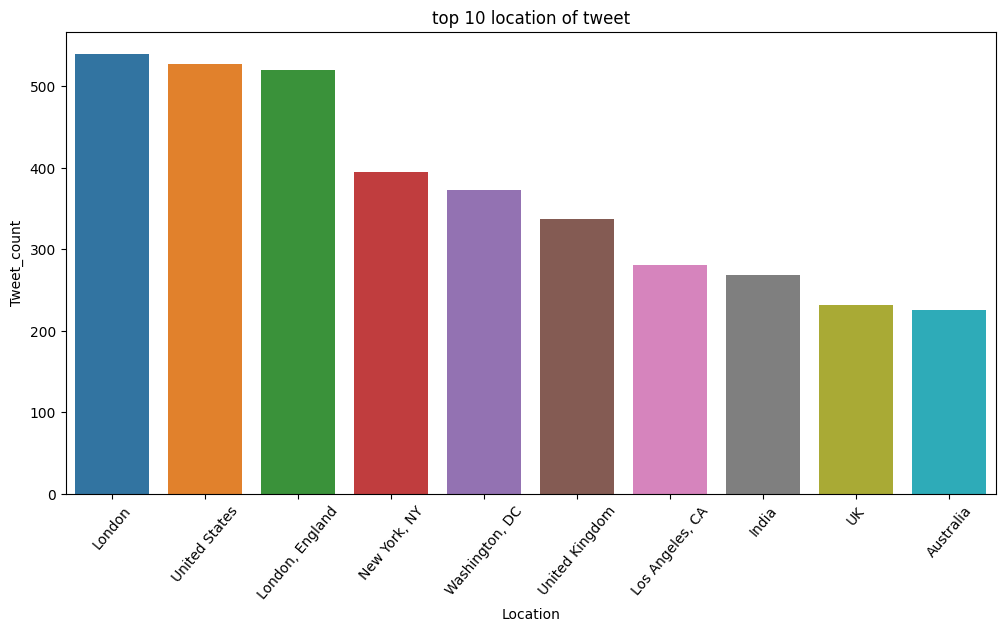

In [39]:
# Chart - 1 visualization code
#visualize top 10 location wise tweets
plt.subplots(figsize=(12,6))
plt.title('top 10 location of tweet')
sns.barplot(x='Location',y='Tweet_count',data = top_10_loc_df)
plt.xticks(rotation = 50)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
The choice of chart to visualize the top 10 location-wise tweets depends on the data, message, and audience.charts, are potential options, each suited to different data and communication needs.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
* most of the tweets comes from London and US.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
The impact of insights depends on how they are interpreted and acted upon. Positive actions can enhance business performance, while neglecting or mismanaging negative insights can lead to negative growth.

#### Chart - 2

* **Visualize tweet by date wise**

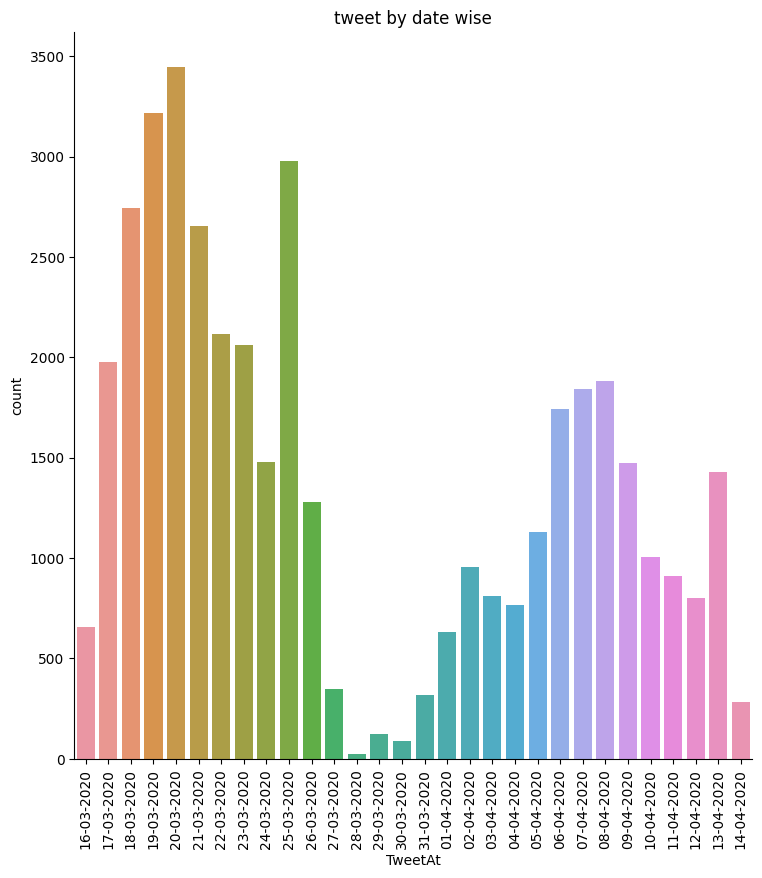

In [40]:
# Chart - 2 visualization code
#visualize tweet by date wise
sns.catplot(x = 'TweetAt',kind ='count',height=8,data = coronavirurs_tweet)
plt.xticks(rotation = 90)
plt.title('tweet by date wise')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
The choice to visualize tweets by date-wise data is often driven by the need to identify temporal patterns and trends. This chart can reveal how tweet volume and sentiment change over time, helping to track events, monitor campaign effectiveness, and make data-driven decisions to adapt strategies based on historical data.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
all tweets belongs to March and April months of 2020

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
Tweets by date can have a positive business impact by identifying trends, improving marketing strategies, and enhancing customer engagement. However, negative insights, such as declining sentiment or increased complaints, may lead to negative growth if not addressed promptly, potentially affecting brand reputation and customer loyalty.

#### Chart - 3

* **Visualize tweet by date wise with Sentiment**

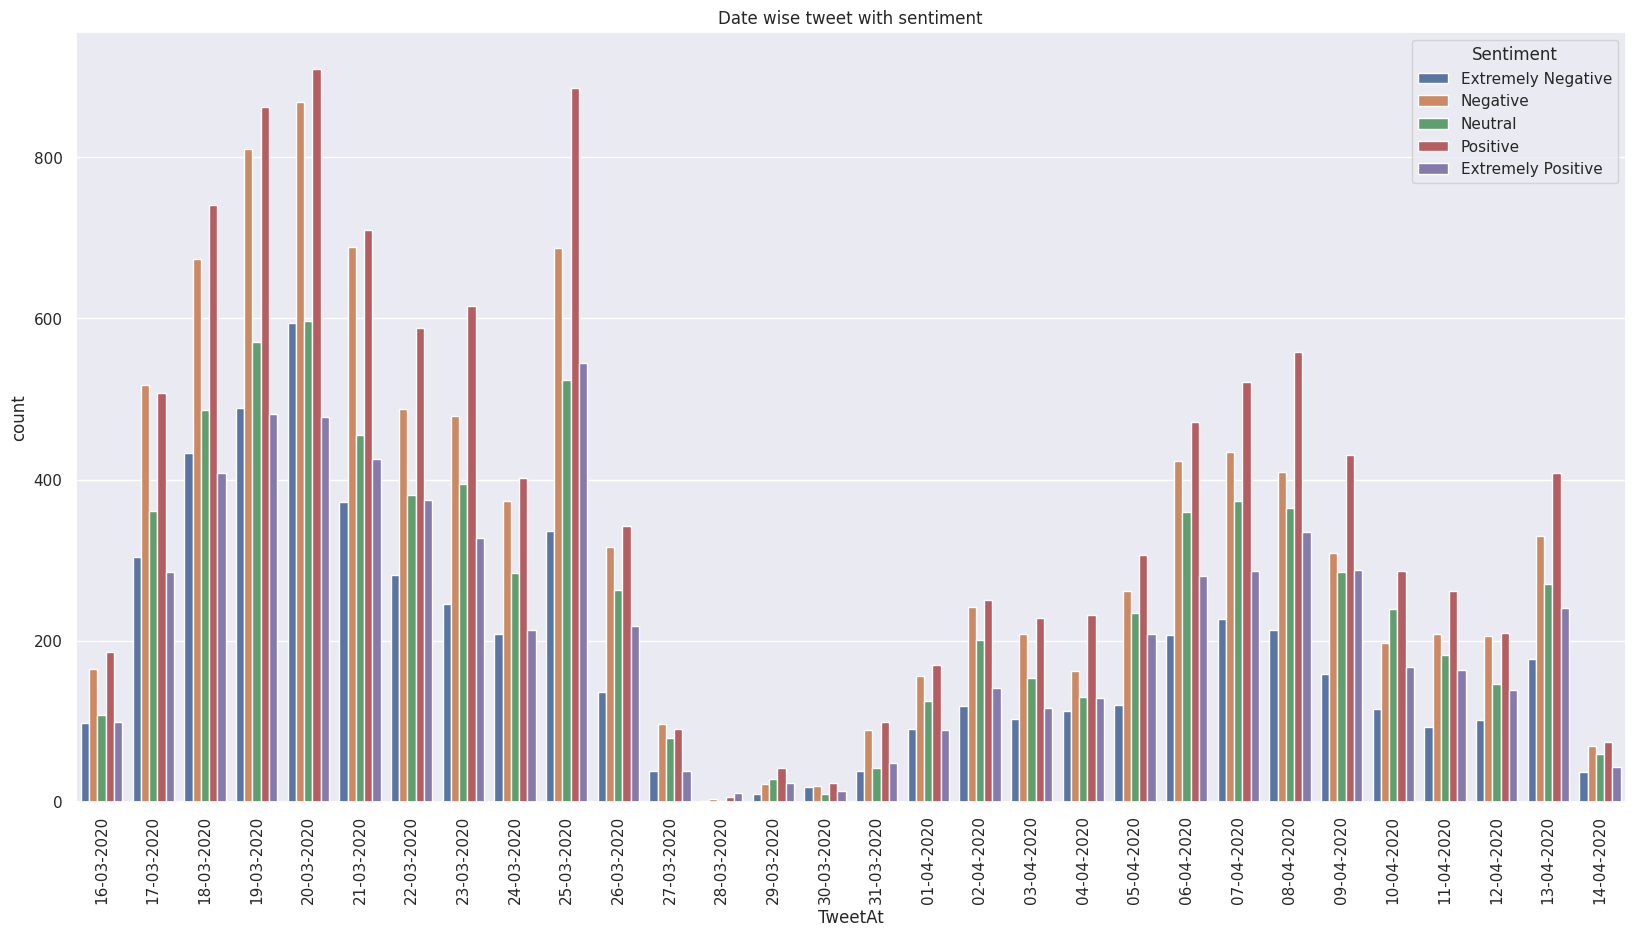

In [41]:
# Chart - 3 visualization code
#visualize tweet by date wise with Sentiment
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(x = 'TweetAt',hue='Sentiment',data = coronavirurs_tweet, hue_order=['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive'])
plt.title('Date wise tweet with sentiment')
plt.xticks(rotation = 90)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
Visualizing tweets by date with sentiment analysis is crucial for understanding how public sentiment evolves over time. This chart allows tracking sentiment shifts, which is valuable for assessing the impact of events, campaigns, or product launches. It aids in adjusting strategies, managing reputation, and ensuring customer satisfaction.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
All tweets belongs to March and April months of 2020

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
Yes, insights from visualizing tweets by date with sentiment can create a positive business impact. Positive sentiment trends can lead to increased customer engagement and brand loyalty. Negative insights, such as declining sentiment, may lead to negative growth if not addressed, affecting reputation and sales, making timely response crucial for maintaining brand health.

#### Chart - 4

* **Tweets acccording to sentiment wise**

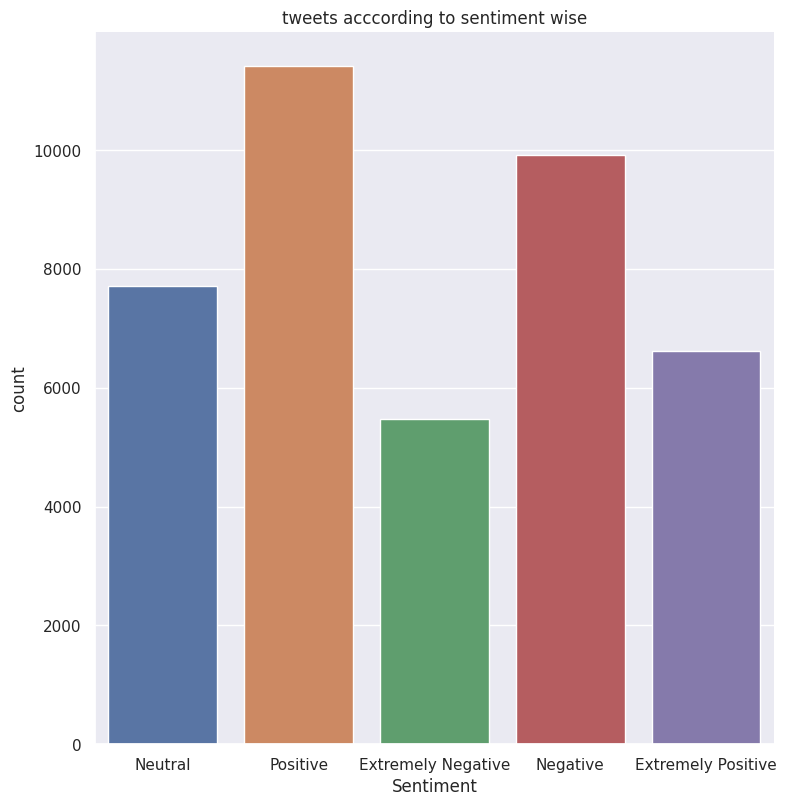

In [42]:
# Chart - 4 visualization code
# tweets acccording to sentiment wise
sns.catplot(x = "Sentiment", kind="count", height=8, data=coronavirurs_tweet)
plt.title("tweets acccording to sentiment wise")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
 I might choose to visualize tweets according to sentiment to understand public perception. This chart reveals the distribution of positive, negative, and neutral sentiments, aiding in gauging customer satisfaction, monitoring brand reputation, and identifying areas for improvement, which is vital for data-driven decision-making and strategy adjustments.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
there are five types of Sentiment in this Dataset:
  Positive,  Negative, Neutral, Extremely Positive, Extremely Negative

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
Visualizing tweets by sentiment can yield a positive business impact by informing reputation management, marketing strategies, and customer satisfaction improvements. Positive sentiment insights can boost brand loyalty. Negative sentiment insights, if unaddressed, may lead to negative growth, impacting reputation and sales, highlighting the importance of proactive response and issue resolution.

#### Chart - 5

**What are the most common words in the entire dataset?**

In [43]:
#function for removing any pattern
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

In [45]:
#removing @username from OriginalTweet
coronavirurs_tweet['cleaned_tweet'] = np.vectorize(remove_pattern)(coronavirurs_tweet['OriginalTweet'], '@[\w]*')

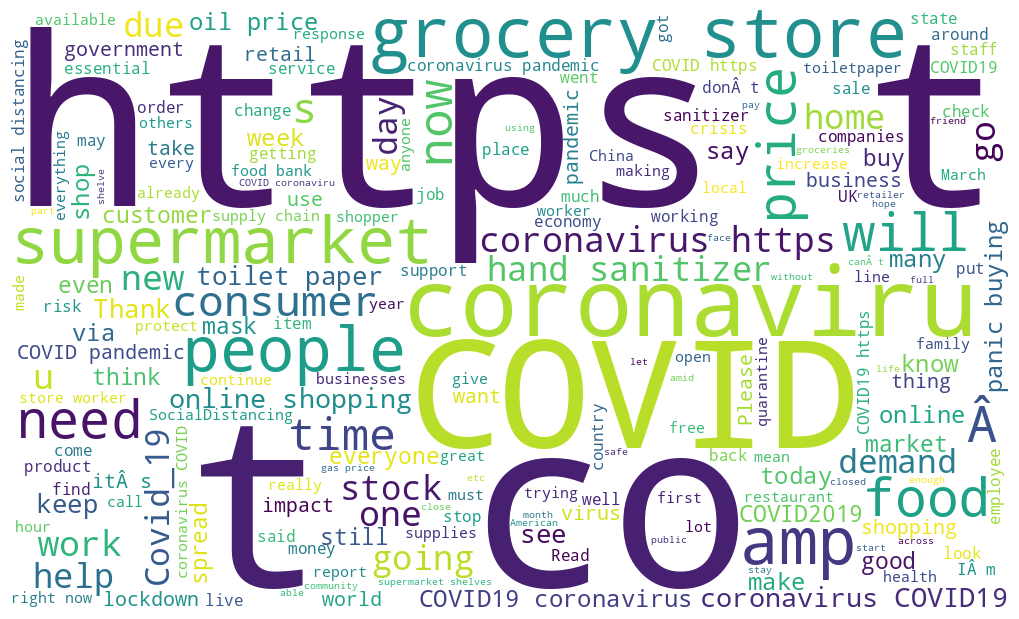

In [46]:
#visualize most common words in the entire dataset
whole_words = ' '.join([text for text in coronavirurs_tweet['cleaned_tweet']])

#generate a word cloud image
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", width=1000, height=600).generate(whole_words)
plt.figure(figsize=(10,6))
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
I chose to visualize the most common words in the entire dataset using a word cloud because it provides a quick and visually appealing way to highlight the key terms or themes in the data. Word clouds offer a concise summary by displaying words proportionally to their frequency, making it easy for viewers to grasp the most prevalent concepts at a glance.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
Most common word in entire data are https,covid, groceri store,amp,corona viru,will,super market,people,need,now.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
The gained insights from visualizing common words can potentially lead to a positive business impact. Identifying key customer preferences or product features can inform decision-making and lead to improved marketing strategies. However, negative growth can occur if the insights reveal issues or negative sentiments that, if unaddressed, could harm the brand's reputation or customer satisfaction, leading to declining sales.

#### Chart - 6

* **Visualize most common words in the Extremely Positive Sentiment**

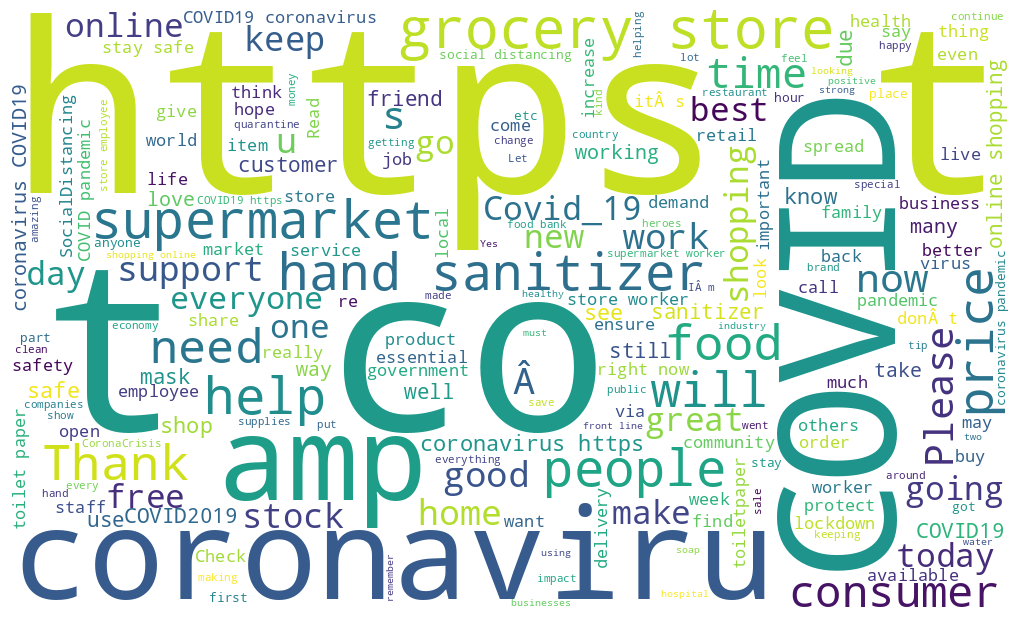

In [47]:
#visualize most common words in the Extremely Positive Sentiment
extreme_positive_words = ' '.join([text for text in coronavirurs_tweet['cleaned_tweet'][coronavirurs_tweet.Sentiment == 'Extremely Positive']])

#generate a word cloud image
wordcloud = WordCloud(background_color="white", width=1000, height=600).generate(extreme_positive_words)
plt.figure(figsize=(10,6))
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
Visualize most common words in Extremely Positive Sentiment" chart to gain a deeper understanding of the most prominent themes or words associated with highly positive sentiments.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
Most common word in entire data are https,covid, groceri store,amp,corona viru,will,super market,people,help ,hand sanit.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
Extremely positive sentiments can create a positive business impact by highlighting what customers love.

#### Chart - 7

* **visualize most common words in the Positive Sentiment**

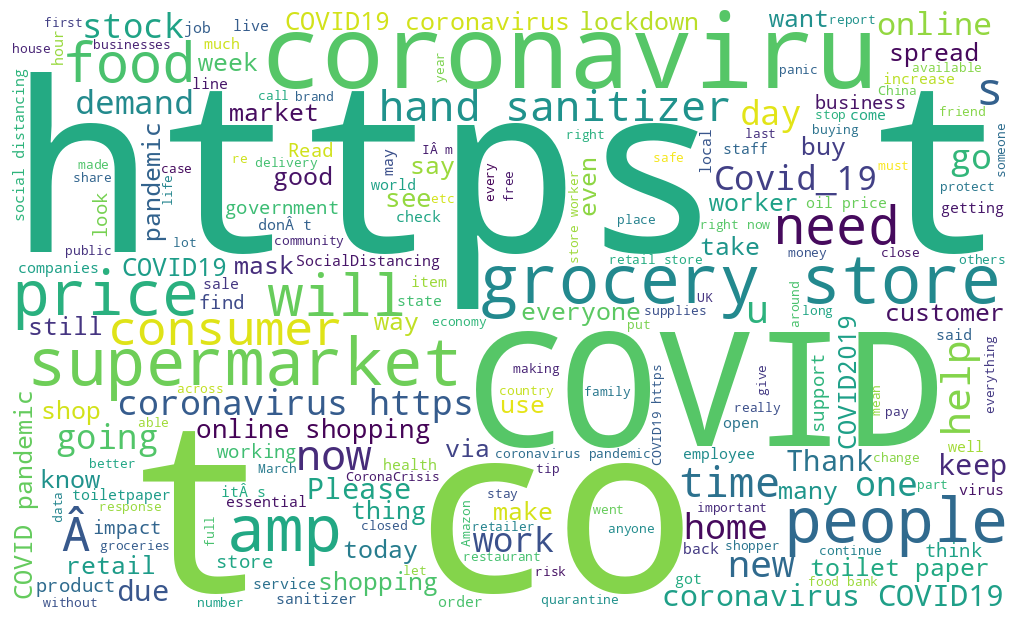

In [48]:
#visualize most common words in the Positive Sentiment
positive_words = ' '.join([text for text in coronavirurs_tweet['cleaned_tweet'][coronavirurs_tweet.Sentiment == 'Positive']])

#generate a word cloud image
wordcloud = WordCloud(background_color="white", width=1000, height=600).generate(positive_words)
plt.figure(figsize=(10,6))
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
Chart to identify prevalent themes and keywords associated with positive sentiments. This can provide valuable insights into customer satisfaction.

##### 2. What is/are the insight(s) found from the chart?

Answer HereMost common word in entire data are https,covid, groceri store, super market,amp,corona viru,will,super market,people,help ,hand sanit,price.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
Positive sentiment can have a positive business impact by highlighting areas of strength and guiding strategies for improvement.

#### Chart - 8

* **visualize most common words in the Extremely Negative Sentiment**

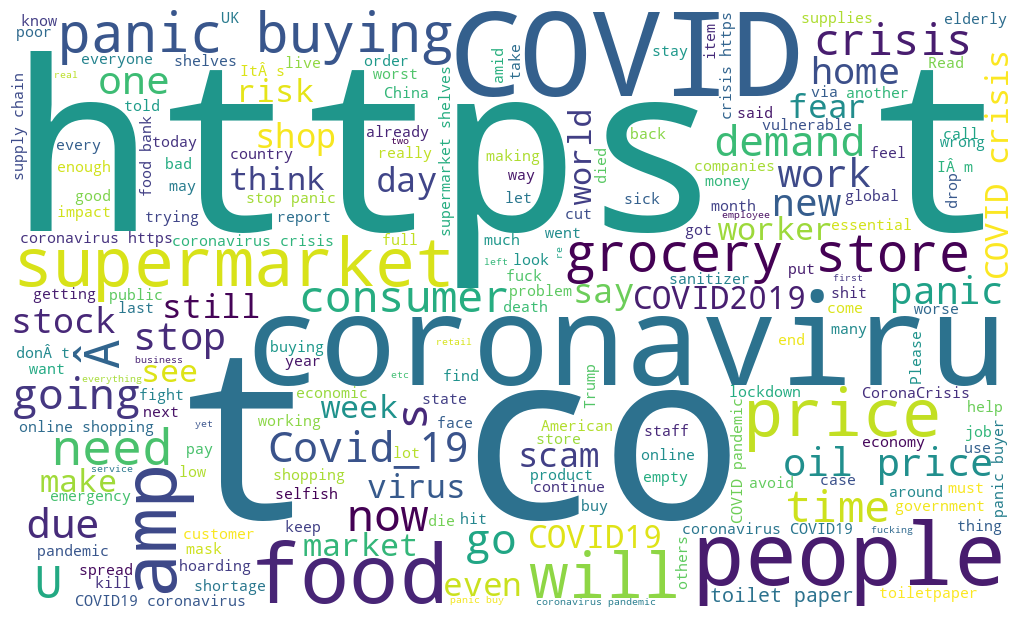

In [49]:
#visualize most common words in the Extremely Negative Sentiment
extreme_negative_words = ' '.join([text for text in coronavirurs_tweet['cleaned_tweet'][coronavirurs_tweet.Sentiment == 'Extremely Negative']])

#generate a word cloud image
wordcloud = WordCloud(background_color="white", width=1000, height=600).generate(extreme_negative_words)
plt.figure(figsize=(10,6))
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
Extremely Negative Sentiment" chart to identify the primary pain points and issues customers experience, which are crucial for addressing and improving customer satisfaction.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
Most common word in entire data are https, covid,panic,buy,amp,corona viru,will,super market,people,food.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
Extremely negative sentiments can potentially create a positive business impact by highlighting areas that need immediate attention and improvement, leading to increased customer satisfaction.

#### Chart - 9

* **Visualize most common words in the Negative Sentiment**

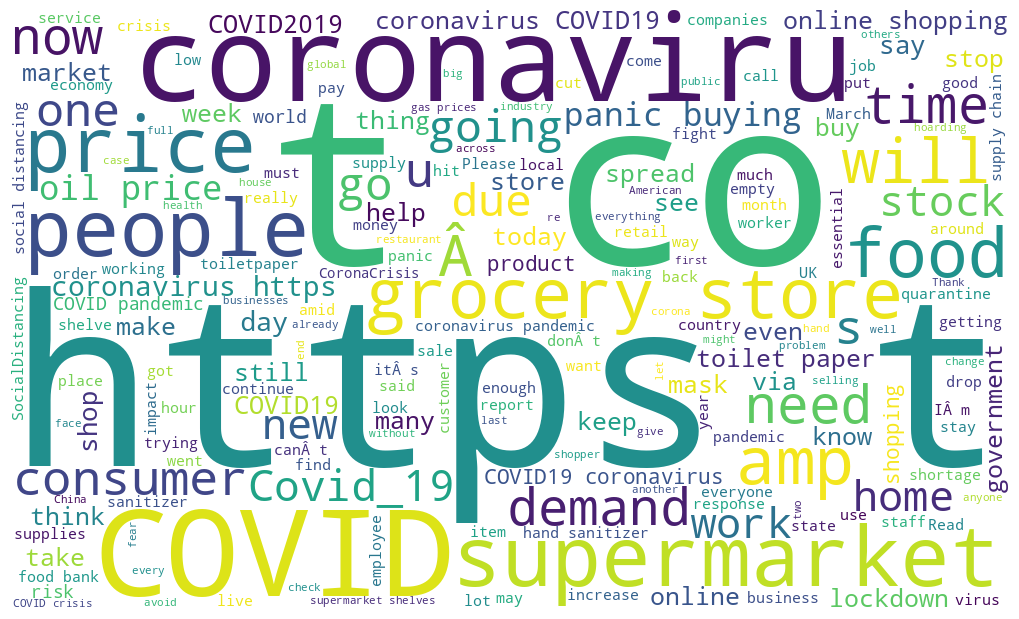

In [50]:
#visualize most common words in the Negative Sentiment
negative_words = ' '.join([text for text in coronavirurs_tweet['cleaned_tweet'][coronavirurs_tweet.Sentiment == 'Negative']])

#generate a word cloud image
wordcloud = WordCloud(background_color="white", width=1000, height=600).generate(negative_words)
plt.figure(figsize=(10,6))
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
It effectively conveys the key terms associated with negative sentiments in a concise manner. This chart assists in identifying prevalent concerns or issues and aids in sentiment analysis by highlighting words that often appear in negative contexts, making it a valuable tool for understanding sentiment patterns.

##### 2. What is/are the insight(s) found from the chart?

Answer Here Most common word in entire data are covid, groceri store,amp,corona viru,will,super market,people,help ,thi,need.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
Yes, the insights gained from analyzing common words in negative sentiment can positively impact businesses by revealing customer pain points and areas needing improvement. Negative growth may occur if these insights are ignored, leading to decreased customer satisfaction, retention, and ultimately, revenue decline due to unaddressed issues and poor customer experiences.

#### Chart - 10

* **Visualize most common words in the Neutral Sentiment**

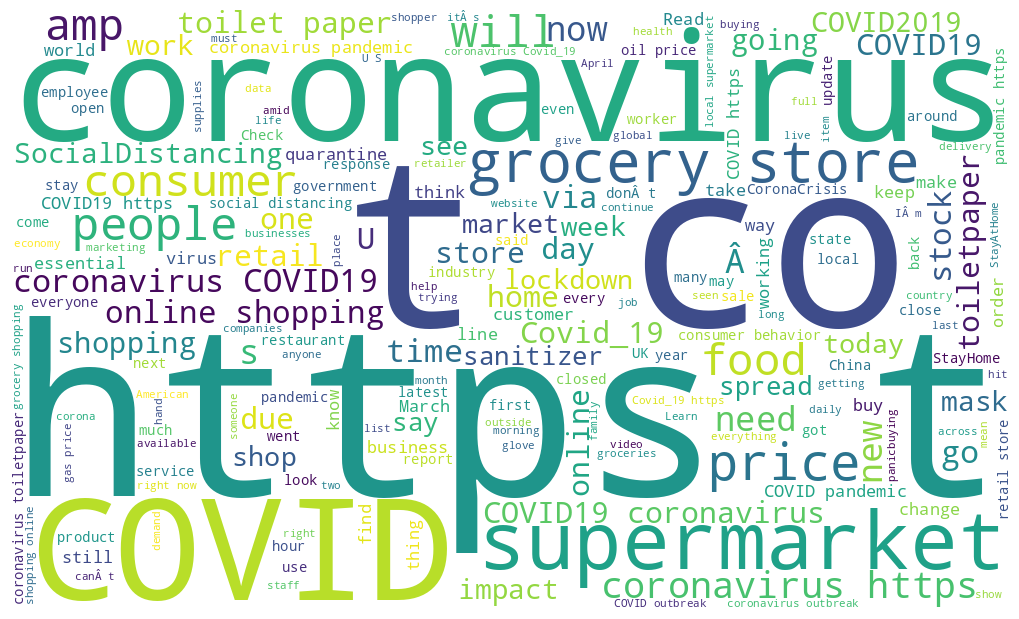

In [51]:
#visualize most common words in the Neutral Sentiment
neutral_words = ' '.join([text for text in coronavirurs_tweet['cleaned_tweet'][coronavirurs_tweet.Sentiment == 'Neutral']])

#generate a word cloud image
wordcloud = WordCloud(background_color="white", width=1000, height=600).generate(neutral_words)
plt.figure(figsize=(10,6))
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
It helps identify the frequently used terms in a neutral context. This chart provides a balanced perspective and helps in understanding the prevailing neutral sentiment themes, aiding in sentiment analysis and ensuring a comprehensive view of customer opinions and feedback.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
Most common word in entire data are covid groceri store,amp,corona viru,will,super market,people,help ,hand sanit.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
Positive business impact by revealing areas of satisfaction and potential for maintaining customer loyalty. However, if insights suggest that customers are indifferent or disengaged, neglecting these signals could lead to negative growth, as businesses may fail to address evolving customer needs and preferences, resulting in reduced competitiveness and market share.

#### Chart - 11

* **Top 10 most common hastag from entire dataset**

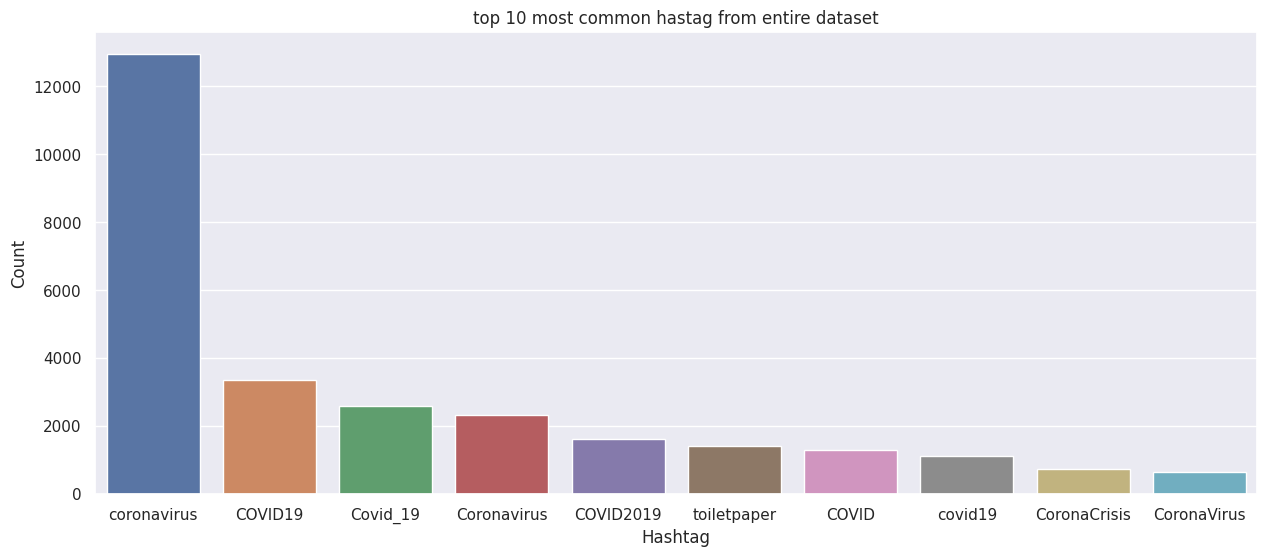

In [52]:
#top 10 most common hastag from entire dataset
hashtag_freq = nltk.FreqDist(total_hashtag)
hashtag_freq_df = pd.DataFrame({'Hashtag': list(hashtag_freq.keys()),'Count' : list(hashtag_freq.values())})
top_10_hashtag_freq = hashtag_freq_df.nlargest(10,'Count')
plt.figure(figsize = (15,6))
sns.barplot(x = 'Hashtag',y = 'Count', data = top_10_hashtag_freq)
plt.title('top 10 most common hastag from entire dataset')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
It provides a quick overview of trending topics or themes on social media. This chart is essential for understanding the prevalent subjects of discussion, facilitating content categorization, and enabling businesses to engage with relevant online conversations effectively.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
Coronavirus and covid19 trends associated with our dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
Positive business impact by informing marketing strategies, helping to target audiences, and capitalize on trending topics. However, ignoring or misinterpreting these insights may result in negative growth if businesses fail to align with the online discourse, missing out on opportunities for engagement and relevance, potentially leading to reduced brand visibility and competitiveness.

#### Chart - 12

* **Top 10 most common hastag from extreme_positive_hashtag**

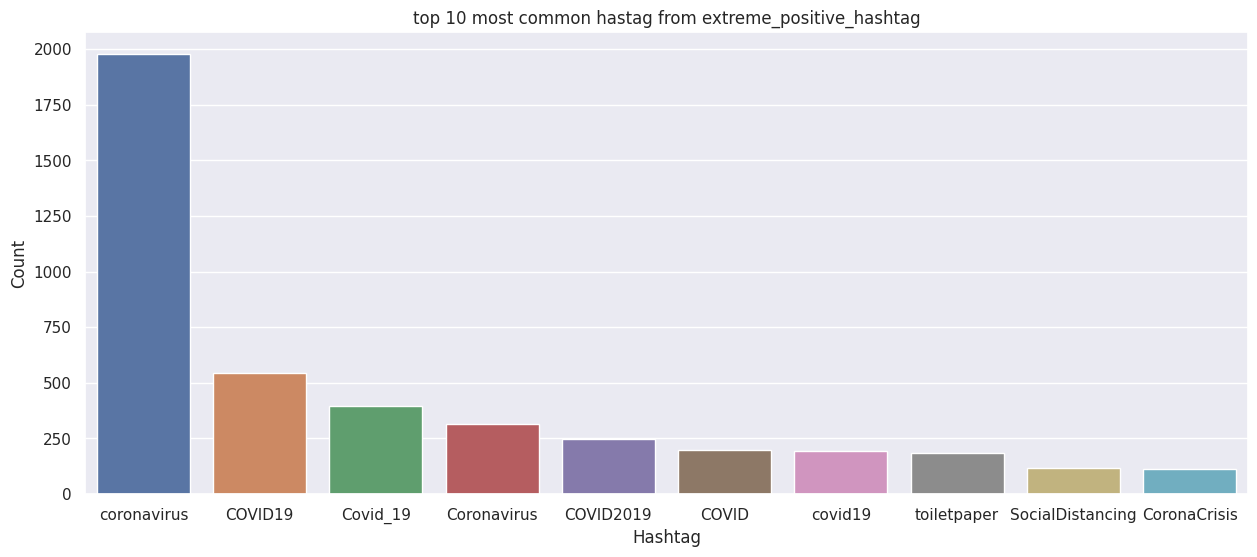

In [53]:
#top 10 most common hastag from extreme_positive_hashtag
hashtag_freq = nltk.FreqDist(extreme_positive_hashtag)
hashtag_freq_df = pd.DataFrame({'Hashtag': list(hashtag_freq.keys()),'Count' : list(hashtag_freq.values())})
top_10_hashtag_freq = hashtag_freq_df.nlargest(10,'Count')
plt.figure(figsize = (15,6))
sns.barplot(x = 'Hashtag',y = 'Count', data = top_10_hashtag_freq)
plt.title('top 10 most common hastag from extreme_positive_hashtag')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
It provides valuable insights into the prevalent themes and topics associated with extreme positivity on social media. Analyzing these hashtags helps understand the most frequently expressed sentiments and interests within this particular context, aiding in sentiment analysis and content classification tasks.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
coronavirus and covid19 trends associated with our dataset

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
Insights from popular hashtags associated with extreme positivity can positively impact businesses by informing marketing strategies. However, if these insights lead to the use of unrelated or inappropriate hashtags, it may result in negative growth as it can harm brand reputation and alienate consumers. Alignment with core values is crucial.

#### Chart - 13

* **top 10 most common hastag from positive_hashtag**

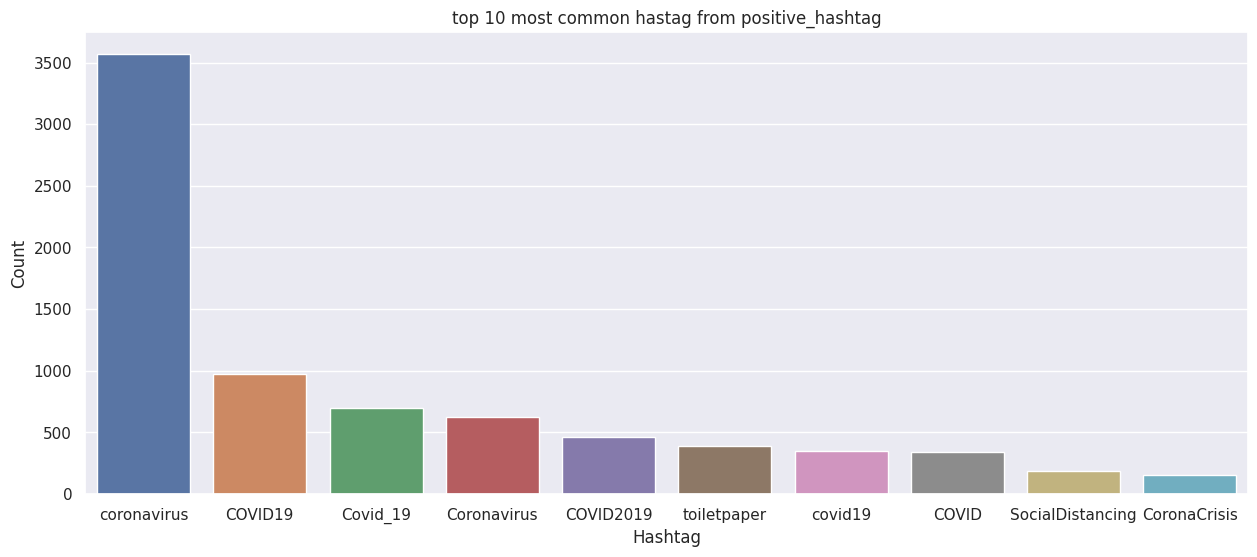

In [54]:
#top 10 most common hastag from positive_hashtag
hashtag_freq = nltk.FreqDist(positive_hashtag)
hashtag_freq_df = pd.DataFrame({'Hashtag': list(hashtag_freq.keys()),'Count' : list(hashtag_freq.values())})
top_10_hashtag_freq = hashtag_freq_df.nlargest(10,'Count')
plt.figure(figsize = (15,6))
sns.barplot(x = 'Hashtag',y = 'Count', data = top_10_hashtag_freq)
plt.title('top 10 most common hastag from positive_hashtag')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
It offers valuable insights into prevalent themes and subjects associated with positivity on social media. Analyzing these hashtags helps in understanding the most frequently expressed positive sentiments and topics, which can inform content strategies and sentiment analysis.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
coronavirus and covid19 trends associated with our dataset

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
A positive business impact by informing marketing strategies that resonate with positive sentiments. However, if these insights reveal hashtags that are unrelated to the business or misaligned with its values, using them may lead to negative growth, damaging brand reputation and alienating customers. Alignment with core values is critical.

#### Chart - 14

* **top 10 most common hastag from neutral_hastag**

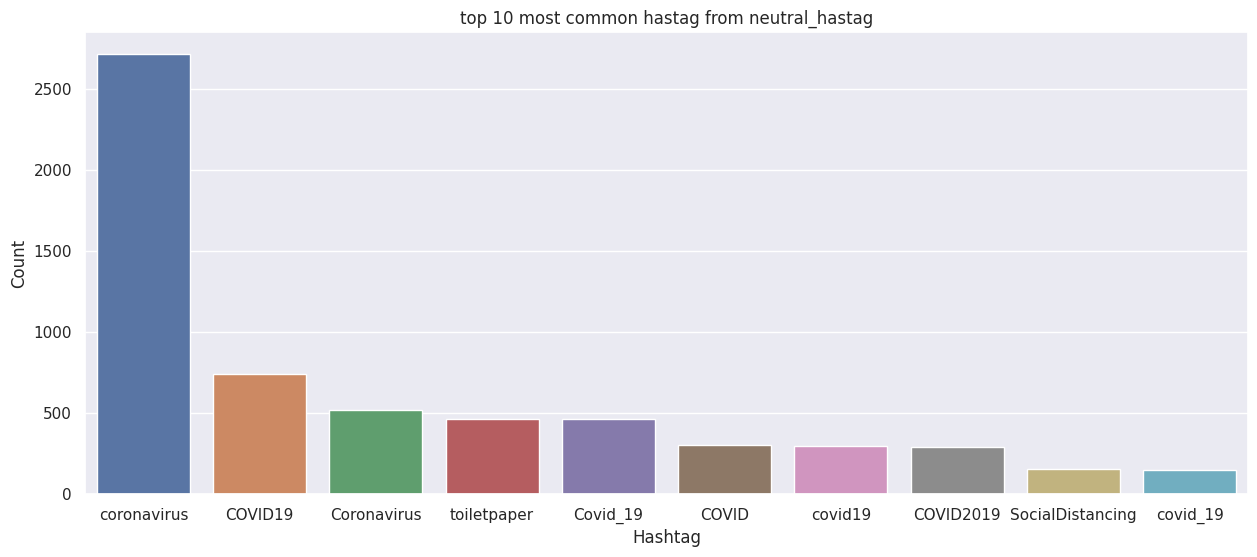

In [55]:
#top 10 most common hastag from neutral_hastag
hashtag_freq = nltk.FreqDist(neutral_hastag)
hashtag_freq_df = pd.DataFrame({'Hashtag': list(hashtag_freq.keys()),'Count' : list(hashtag_freq.values())})
top_10_hashtag_freq = hashtag_freq_df.nlargest(10,'Count')
plt.figure(figsize = (15,6))
sns.barplot(x = 'Hashtag',y = 'Count', data = top_10_hashtag_freq)
plt.title('top 10 most common hastag from neutral_hastag')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here
It provides insights into prevalent topics and themes associated with neutrality on social media. Analyzing these hashtags helps in understanding common, non-emotive subjects, which can be valuable for content categorization and sentiment analysis in various applications.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
coronavirus and covid19 trends associated with our dataset

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
Positive business impact, as neutrality typically lacks emotional engagement. However, understanding neutral topics can be valuable for context-aware marketing. Inappropriately using these insights or misinterpreting neutrality may lead to negative growth by not resonating with the audience or being perceived as indifferent.

#### Chart - 15

* **top 10 most common hastag from negative_hashtag**

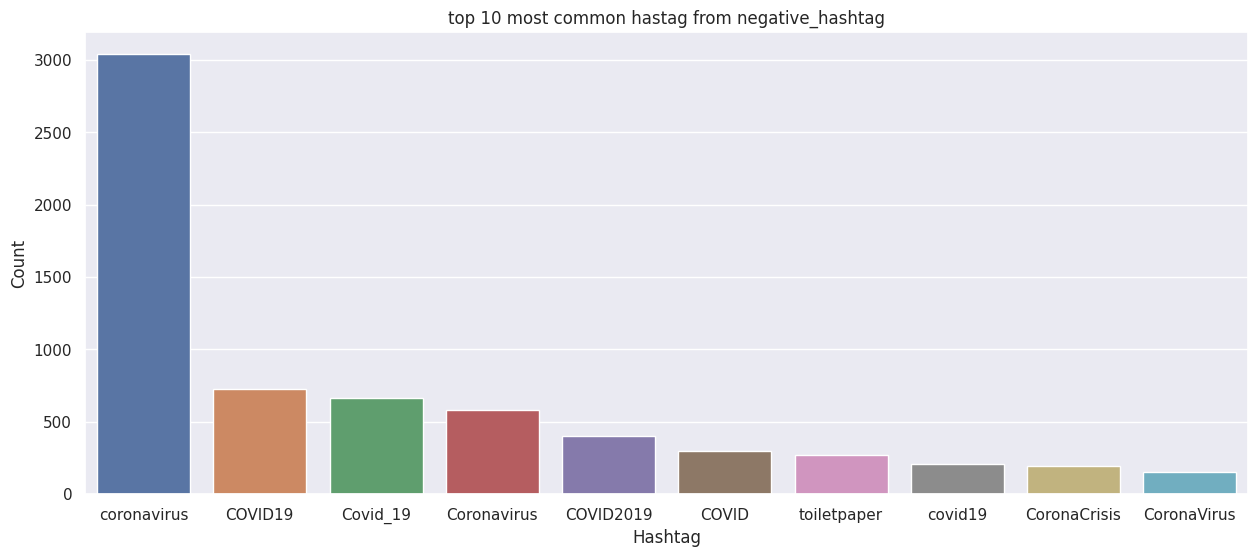

In [56]:
#top 10 most common hastag from negative_hashtag
hashtag_freq = nltk.FreqDist(negative_hashtag)
hashtag_freq_df = pd.DataFrame({'Hashtag': list(hashtag_freq.keys()),'Count' : list(hashtag_freq.values())})
top_10_hashtag_freq = hashtag_freq_df.nlargest(10,'Count')
plt.figure(figsize = (15,6))
sns.barplot(x = 'Hashtag',y= 'Count', data = top_10_hashtag_freq)
plt.title('top 10 most common hastag from negative_hashtag')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here
It offers insights into prevalent themes and subjects associated with negativity on social media. Analyzing these hashtags helps in understanding the most frequently expressed negative sentiments and topics, which can inform content strategies and sentiment analysis, aiding in managing and addressing negative sentiment online.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
coronavirus and covid19 trends associated with our dataset

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
Top 10 most common hashtags from negative_hashtags" can help businesses by identifying and addressing negative sentiments, potentially improving brand reputation. However, inappropriate use or misinterpretation of these insights may lead to negative growth, as misaligned responses can intensify negativity and harm the brand's image. Careful management is essential to leverage these insights positively.

#### Chart - 16

* **top 10 most common hastag from extreme_negative_hashtag**

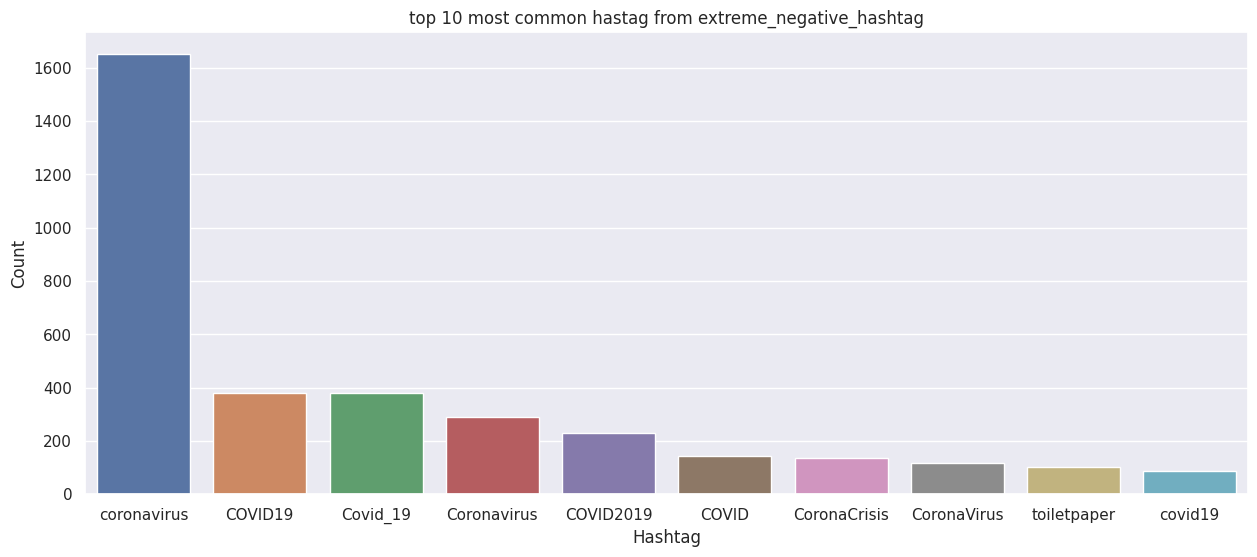

In [57]:
#top 10 most common hastag from extreme_negative_hashtag
hashtag_freq = nltk.FreqDist(extreme_negative_hashtag)
hashtag_freq_df = pd.DataFrame({'Hashtag': list(hashtag_freq.keys()),'Count' : list(hashtag_freq.values())})
top_10_hashtag_freq = hashtag_freq_df.nlargest(10,'Count')
plt.figure(figsize = (15,6))
sns.barplot(x = 'Hashtag',y = 'Count', data = top_10_hashtag_freq)
plt.title('top 10 most common hastag from extreme_negative_hashtag')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here
It provides critical insights into the prevalent themes and topics associated with extreme negativity on social media. Analyzing these hashtags helps understand the most frequently expressed negative sentiments and concerning issues, which can be valuable for sentiment analysis, crisis management, and content moderation.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
coronavirus and covid19 trends associated with our dataset

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
May not directly create a positive business impact due to their highly negative nature. Inappropriately using these insights or engaging with such hashtags can lead to negative growth, damaging brand reputation and alienating customers. Careful handling is essential

## ***6. Feature Engineering & Data Pre-processing***

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

*  ### **Removing pattern**

In [58]:
#function for removing any pattern
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

In [59]:
#removing @username from OriginalTweet
coronavirurs_tweet['cleaned_tweet'] = np.vectorize(remove_pattern)(coronavirurs_tweet['OriginalTweet'], '@[\w]*')

In [60]:
#after removed @username
coronavirurs_tweet.head()

,Location,TweetAt,OriginalTweet,Sentiment,cleaned_tweet
0,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8
1,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...,Positive,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...
2,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P"
3,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\...",Positive,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\..."
4,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don...",Extremely Negative,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don..."


#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

In [61]:
#removing special characters, numbers and punctuations from cleaned_tweet
coronavirurs_tweet['cleaned_tweet'] = coronavirurs_tweet['cleaned_tweet'].str.replace('[^a-zA-Z#]+',' ')

In [62]:
#after removed special characters, numbers and punctuations
coronavirurs_tweet.head()

,Location,TweetAt,OriginalTweet,Sentiment,cleaned_tweet
0,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,https t co iFz FAn Pa and https t co xX ghGFzCC and https t co I NlzdxNo
1,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...,Positive,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...
2,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,Coronavirus Australia Woolworths to give elderly disabled dedicated shopping hours amid COVID outbreak https t co bInCA Vp P
3,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\...",Positive,My food stock is not the only one which is empty PLEASE don t panic THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need Stay calm stay safe #COVID france #COVID #COVID #co...
4,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don...",Extremely Negative,Me ready to go at supermarket during the #COVID outbreak Not because I m paranoid but because my food stock is litteraly empty The #coronavirus is a serious thing but please don t panic It causes ...


#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

In [63]:
#removing http and url from cleaned_tweet
coronavirurs_tweet['cleaned_tweet'] = coronavirurs_tweet['cleaned_tweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [64]:
#after removed http and url
coronavirurs_tweet.head()

,Location,TweetAt,OriginalTweet,Sentiment,cleaned_tweet
0,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,https t co iFz FAn Pa and https t co xX ghGFzCC and https t co I NlzdxNo
1,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...,Positive,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...
2,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,Coronavirus Australia Woolworths to give elderly disabled dedicated shopping hours amid COVID outbreak https t co bInCA Vp P
3,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\...",Positive,My food stock is not the only one which is empty PLEASE don t panic THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need Stay calm stay safe #COVID france #COVID #COVID #co...
4,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don...",Extremely Negative,Me ready to go at supermarket during the #COVID outbreak Not because I m paranoid but because my food stock is litteraly empty The #coronavirus is a serious thing but please don t panic It causes ...


#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [65]:
#removing short words(length less than 3)
coronavirurs_tweet['cleaned_tweet'] = coronavirurs_tweet['cleaned_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))

In [ ]:
# Remove White spaces

In [66]:
#after removed short words(length less than 3)
coronavirurs_tweet.head()

,Location,TweetAt,OriginalTweet,Sentiment,cleaned_tweet
0,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,https iFz FAn and https ghGFzCC and https NlzdxNo
1,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...,Positive,advice Talk your neighbours family exchange phone numbers create contact list with phone numbers neighbours schools employer chemist set online shopping accounts poss adequate supplies regular med...
2,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,Coronavirus Australia Woolworths give elderly disabled dedicated shopping hours amid COVID outbreak https bInCA
3,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\...",Positive,food stock not the only one which empty PLEASE don panic THERE WILL ENOUGH FOOD FOR EVERYONE you not take more than you need Stay calm stay safe #COVID france #COVID #COVID #coronavirus #confineme...
4,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don...",Extremely Negative,ready supermarket during the #COVID outbreak Not because paranoid but because food stock litteraly empty The #coronavirus serious thing but please don panic causes shortage #CoronavirusFrance #res...


In [67]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [68]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

#### 7. Tokenization

In [ ]:
# Tokenization

In [69]:
#tokenizing tweet from cleaned_tweet
tokenized_tweet = coronavirurs_tweet['cleaned_tweet'].apply(lambda x: x.split())

In [70]:
tokenized_tweet[:5]

0                                                                                                                                                [https, iFz, FAn, and, https, ghGFzCC, and, https, NlzdxNo]
1    [advice, Talk, your, neighbours, family, exchange, phone, numbers, create, contact, list, with, phone, numbers, neighbours, schools, employer, chemist, set, online, shopping, accounts, poss, adequ...
2                                                                             [Coronavirus, Australia, Woolworths, give, elderly, disabled, dedicated, shopping, hours, amid, COVID, outbreak, https, bInCA]
3    [food, stock, not, the, only, one, which, empty, PLEASE, don, panic, THERE, WILL, ENOUGH, FOOD, FOR, EVERYONE, you, not, take, more, than, you, need, Stay, calm, stay, safe, #COVID, france, #COVID...
4    [ready, supermarket, during, the, #COVID, outbreak, Not, because, paranoid, but, because, food, stock, litteraly, empty, The, #coronavirus, serious, thing, but, please, don, p

In [71]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

#apply stemmer for tokenized_tweet
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [72]:
tokenized_tweet[:5]

0                                                                                                                                                   [http, ifz, fan, and, http, ghgfzcc, and, http, nlzdxno]
1    [advic, talk, your, neighbour, famili, exchang, phone, number, creat, contact, list, with, phone, number, neighbour, school, employ, chemist, set, onlin, shop, account, poss, adequ, suppli, regula...
2                                                                                           [coronaviru, australia, woolworth, give, elderli, disabl, dedic, shop, hour, amid, covid, outbreak, http, binca]
3    [food, stock, not, the, onli, one, which, empti, pleas, don, panic, there, will, enough, food, for, everyon, you, not, take, more, than, you, need, stay, calm, stay, safe, #covid, franc, #covid, #...
4    [readi, supermarket, dure, the, #covid, outbreak, not, becaus, paranoid, but, becaus, food, stock, litterali, empti, the, #coronaviru, seriou, thing, but, pleas, don, panic, c

In [73]:
#join all tokens into one sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

In [74]:
#join all tokens into one sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

In [75]:
#after apply tokenized_tweet
coronavirurs_tweet.head()

,Location,TweetAt,OriginalTweet,Sentiment,cleaned_tweet
0,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,https iFz FAn and https ghGFzCC and https NlzdxNo
1,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...,Positive,advice Talk your neighbours family exchange phone numbers create contact list with phone numbers neighbours schools employer chemist set online shopping accounts poss adequate supplies regular med...
2,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,Coronavirus Australia Woolworths give elderly disabled dedicated shopping hours amid COVID outbreak https bInCA
3,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\...",Positive,food stock not the only one which empty PLEASE don panic THERE WILL ENOUGH FOOD FOR EVERYONE you not take more than you need Stay calm stay safe #COVID france #COVID #COVID #coronavirus #confineme...
4,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don...",Extremely Negative,ready supermarket during the #COVID outbreak Not because paranoid but because food stock litteraly empty The #coronavirus serious thing but please don panic causes shortage #CoronavirusFrance #res...


### 4. Feature Manipulation & Selection

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

we have explore all the feature and in our analysis only two feature is important that's why we need to take only two feature cleaned_tweet and Sentiment feature

In [76]:
#only two feature selected for analysis
coronavirurs_tweet_df = coronavirurs_tweet[['cleaned_tweet','Sentiment']]

In [77]:
#overview of datset with selected feature
coronavirurs_tweet_df.head()

,cleaned_tweet,Sentiment
0,https iFz FAn and https ghGFzCC and https NlzdxNo,Neutral
1,advice Talk your neighbours family exchange phone numbers create contact list with phone numbers neighbours schools employer chemist set online shopping accounts poss adequate supplies regular med...,Positive
2,Coronavirus Australia Woolworths give elderly disabled dedicated shopping hours amid COVID outbreak https bInCA,Positive
3,food stock not the only one which empty PLEASE don panic THERE WILL ENOUGH FOOD FOR EVERYONE you not take more than you need Stay calm stay safe #COVID france #COVID #COVID #coronavirus #confineme...,Positive
4,ready supermarket during the #COVID outbreak Not because paranoid but because food stock litteraly empty The #coronavirus serious thing but please don panic causes shortage #CoronavirusFrance #res...,Extremely Negative


In [78]:
#how many types of sentiment
coronavirurs_tweet_df['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

**Removing Stopwords**

In [79]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [80]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [81]:
coronavirurs_tweet_df['cleaned_tweet'].apply(lambda x: [item for item in x if item not in stop])

0                                                                                                            [h, p,  , F, z,  , F, A, n,  , n,  , h, p,  , g, h, G, F, z, C, C,  , n,  , h, p,  , N, l, z, x, N]
1        [v, c, e,  , T, l, k,  , u, r,  , n, e, g, h, b, u, r,  , f, l,  , e, x, c, h, n, g, e,  , p, h, n, e,  , n, u, b, e, r,  , c, r, e, e,  , c, n, c,  , l,  , w, h,  , p, h, n, e,  , n, u, b, e, r, ...
2        [C, r, n, v, r, u,  , A, u, r, l,  , W, l, w, r, h,  , g, v, e,  , e, l, e, r, l,  , b, l, e,  , e, c, e,  , h, p, p, n, g,  , h, u, r,  ,  , C, O, V, I, D,  , u, b, r, e, k,  , h, p,  , b, I, n, ...
3        [f,  , c, k,  , n,  , h, e,  , n, l,  , n, e,  , w, h, c, h,  , e, p,  , P, L, E, A, S, E,  , n,  , p, n, c,  , T, H, E, R, E,  , W, I, L, L,  , E, N, O, U, G, H,  , F, O, O, D,  , F, O, R,  , E, ...
4        [r, e,  , u, p, e, r, r, k, e,  , u, r, n, g,  , h, e,  , #, C, O, V, I, D,  , u, b, r, e, k,  , N,  , b, e, c, u, e,  , p, r, n,  , b, u,  , b, e, c, u, e

In [82]:
#overview of datset after removed stop words
coronavirurs_tweet_df.head()

,cleaned_tweet,Sentiment
0,https iFz FAn and https ghGFzCC and https NlzdxNo,Neutral
1,advice Talk your neighbours family exchange phone numbers create contact list with phone numbers neighbours schools employer chemist set online shopping accounts poss adequate supplies regular med...,Positive
2,Coronavirus Australia Woolworths give elderly disabled dedicated shopping hours amid COVID outbreak https bInCA,Positive
3,food stock not the only one which empty PLEASE don panic THERE WILL ENOUGH FOOD FOR EVERYONE you not take more than you need Stay calm stay safe #COVID france #COVID #COVID #coronavirus #confineme...,Positive
4,ready supermarket during the #COVID outbreak Not because paranoid but because food stock litteraly empty The #coronavirus serious thing but please don panic causes shortage #CoronavirusFrance #res...,Extremely Negative


In [83]:
#shape of dataset
coronavirurs_tweet_df.shape

(41157, 2)

In [84]:
#checking any null value present
coronavirurs_tweet_df.isna().sum()

cleaned_tweet    0
Sentiment        0
dtype: int64

##### What all feature selection methods have you used  and why?

we have explore all the feature

##### Which all features you found important and why?

we have explore all the feature and in our analysis only two feature is important that's why we need to take only two feature cleaned_tweet and Sentiment feature

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

In [85]:
#assign X as a independent variable and y as a dependent variable
X = coronavirurs_tweet_df['cleaned_tweet']
y = coronavirurs_tweet_df['Sentiment']

In [86]:
#spliting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

In [87]:
#shape of training and testing dataset
print(f'X_train.shape :{X_train.shape}')
print(f'y_train.shape :{y_train.shape}')
print(f'X_test.shape :{X_test.shape}')
print(f'y_test.shape :{y_test.shape}')

X_train.shape :(32925,)
y_train.shape :(32925,)
X_test.shape :(8232,)
y_test.shape :(8232,)


In [88]:
#using counter vectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(X_train.values)
X_test = vectorizer.transform(X_test.values)

In [89]:
#shape of training and testing dataset
print(f'X_train.shape :{X_train.shape}')
print(f'y_train.shape :{y_train.shape}')
print(f'X_test.shape :{X_test.shape}')
print(f'y_test.shape :{y_test.shape}')

X_train.shape :(32925, 60414)
y_train.shape :(32925,)
X_test.shape :(8232, 60414)
y_test.shape :(8232,)


##### What data splitting ratio have you used and why?

Data splitting ratio 20/80(test/train)  